<a href="https://colab.research.google.com/github/Habtamuyihun561/MAIA/blob/main/Copy_of_ml_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chalenge 1
Dataset loading,
Dataset analysis,
data set preparation,
model creation ,
model training ,
modle evaluation


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
data,target=iris.data,iris.target
#print(data) #features
#print(target) #label
print(len(data))#check length of the data
data.shape #shape of the data
target.shape
print("Data:".format())

In [ ]:
# Data set analysis using panda
import pandas as pd
iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(iris_df)
iris_df.describe()
iris_df.info()


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# data preparation
# Data is divide into trainign and testing data
from sklearn.model_selection import train_test_split
data_train, data_test, target_train,target_test=train_test_split(data,target,test_size=0.2, random_state=41)
print(len(data_train))
print(len(data_test))
print(len(target_train))
print(len(target_test))

In [ ]:
# Model Creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

model= KNeighborsClassifier(n_neighbors=3)
# Training
model.fit(data_train, target_train)

#Testing

predictions=model.predict(data_test)
print(predictions)
#Model Evaluation
accuracy=accuracy_score(target_test,predictions)
print(accuracy)
confusion_matrix(target_test, predictions)



Challenge 2, Breat cancer data set

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
data=dataset.data
target=dataset.target
#print(ldata)
#print(target)
print(len(data))
print(len(target))
#target=data.target[[10, 50, 85]]
x_train,x_test, y_train,y_test= train_test_split(data,target, test_size=0.2, random_state=42)

print(len(x_train))
print(len(x_test))
print(len(y_train))


In [ ]:
# Model Creation
from sklearn import svm
model= KNeighborsClassifier(n_neighbors=3)

#Testing
predictions=model.predict(x_test)
print(predictions)
# Model evaluation
accuracy=accuracy_score(y_test,predictions)
print(accuracy)
confusion_matrix(y_test, predictions)

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Training
model.fit(x_train, y_train)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)


#Machine Learning Lab 2: Feature Extraction and Cross Validation
#Challenge 1

In [ ]:
# feature extraction
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Step 2: Exploratory Data Analysis
print("Feature Names:", iris.feature_names)
print("Target Names:", iris.target_names)
#print(X.shape)
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

In [ ]:
# Step 3: Feature Selection
# For demonstration, let's use SelectKBest with chi2 to select top 100 features
#k_best = SelectKBest(score_func=chi2, k=100)
#X_selected = k_best.fit_transform(X, y)

# Print indices of selected features
#selected_feature_indices = np.where(k_best.get_support())[0]
#print("Indices of selected features:", selected_feature_indices)

In [ ]:
# Step 3: Feature Selection
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection Technique 1: SelectKBest with chi2
k_best = SelectKBest(score_func=chi2, k=2)
X_train_kbest = k_best.fit_transform(X_train, y_train)
selected_features_kbest = np.array(iris.feature_names)[k_best.get_support()]
#print("number of samples",selected_features_kbest.shape)


# Feature Selection Technique 2: Recursive Feature Elimination (RFE) with Random Forest
rf_classifier = RandomForestClassifier()
rfe = RFE(estimator=rf_classifier, n_features_to_select=2, step=1)
X_train_rfe = rfe.fit_transform(X_train, y_train)
selected_features_rfe = np.array(iris.feature_names)[rfe.get_support()]

number of samples 2
number of samples (2,)


In [ ]:
# Step 4: Train a classifier using the selected features
# Train classifiers using selected features
rf_classifier_all_features = RandomForestClassifier()
rf_classifier_selected_features_kbest = RandomForestClassifier()
rf_classifier_selected_features_rfe = RandomForestClassifier()

# Train with all features
rf_classifier_all_features.fit(X_train, y_train)

# Train with selected features using SelectKBest
rf_classifier_selected_features_kbest.fit(X_train_kbest, y_train)

# Train with selected features using RFE
rf_classifier_selected_features_rfe.fit(X_train_rfe, y_train)

RandomForestClassifier()

In [ ]:
# Step 5: Evaluate the performance of the model
# Test on the testing set
y_pred_all_features = rf_classifier_all_features.predict(X_test)
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)

# Transform test set using selected features
X_test_kbest = k_best.transform(X_test)
X_test_rfe = rfe.transform(X_test)

# Predictions using models with selected features
y_pred_kbest = rf_classifier_selected_features_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)

y_pred_rfe = rf_classifier_selected_features_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

In [ ]:
# Step 6: Compare the performance
print("Accuracy with all features:", accuracy_all_features)
print("Selected features using SelectKBest:", selected_features_kbest)
print("Accuracy with selected features using SelectKBest:", accuracy_kbest)
print("Selected features using RFE:", selected_features_rfe)
print("Accuracy with selected features using RFE:", accuracy_rfe)

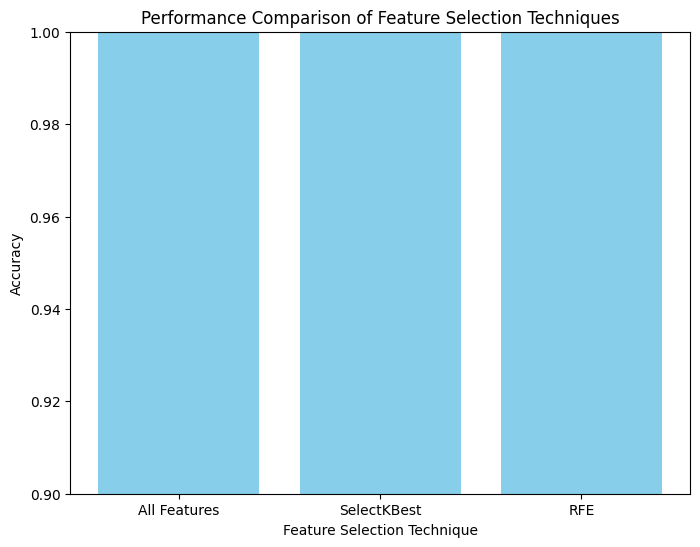

In [ ]:
import matplotlib.pyplot as plt

# List of feature selection techniques
feature_selection_methods = ['All Features', 'SelectKBest', 'RFE']

# List of accuracies obtained for each feature selection technique
accuracy_scores = [accuracy_all_features, accuracy_kbest, accuracy_rfe]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(feature_selection_methods, accuracy_scores, color='skyblue')
plt.xlabel('Feature Selection Technique')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Feature Selection Techniques')
plt.ylim(0.9, 1.0)  # Adjust ylim if needed
plt.show()


#Chalenge 2

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [ ]:
# Assuming X and y are your feature matrix and target vector, respectively

# Step 1: Splitting the dataset into k folds
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
# Step 2, 3, 4, 5: Cross-validation loop
accuracy_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train your model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store performance metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop over each fold in k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train your model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Evaluate the model on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append scores to respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculate average scores
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

# Print average scores
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-score:", avg_f1)


In [ ]:
# Step 4: Average performance
average_performance = np.mean(accuracy_scores)

print("Average Accuracy:", average_performance)

#Tria project on MNIST dataset

In [ ]:
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target.astype(int)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])


# Breat Cancer Dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Step 1: Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [ ]:
# Step 2: Exploratory Data Analysis
print("Feature Names:", cancer.feature_names)
print("Target Names:", cancer.target_names)
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

In [ ]:
# Step 3: Feature Selection
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection Technique 1: SelectKBest with chi2
k_best = SelectKBest(score_func=chi2, k=10)
X_train_kbest = k_best.fit_transform(X_train, y_train)
selected_features_kbest = [cancer.feature_names[i] for i in k_best.get_support(indices=True)]

# Feature Selection Technique 2: Recursive Feature Elimination (RFE) with Random Forest
rf_classifier = RandomForestClassifier()
rfe = RFE(estimator=rf_classifier, n_features_to_select=10, step=1)
X_train_rfe = rfe.fit_transform(X_train, y_train)
selected_features_rfe = [cancer.feature_names[i] for i in rfe.get_support(indices=True)]


In [ ]:
# Step 4: Train a classifier using the selected features
# Train classifiers using selected features
rf_classifier_selected_features_kbest = RandomForestClassifier()
rf_classifier_selected_features_rfe = RandomForestClassifier()

# Train with selected features using SelectKBest
rf_classifier_selected_features_kbest.fit(X_train_kbest, y_train)

# Train with selected features using RFE
rf_classifier_selected_features_rfe.fit(X_train_rfe, y_train)

RandomForestClassifier()

In [ ]:
# Step 5: Evaluate the performance of the model
# Transform test set using selected features
X_test_kbest = k_best.transform(X_test)
X_test_rfe = rfe.transform(X_test)

# Predictions using models with selected features
y_pred_kbest = rf_classifier_selected_features_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)

y_pred_rfe = rf_classifier_selected_features_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

In [ ]:
# Step 6: Compare the performance
print("Selected features using SelectKBest:", selected_features_kbest)
print("Accuracy with selected features using SelectKBest:", accuracy_kbest)
print("Selected features using RFE:", selected_features_rfe)
print("Accuracy with selected features using RFE:", accuracy_rfe)

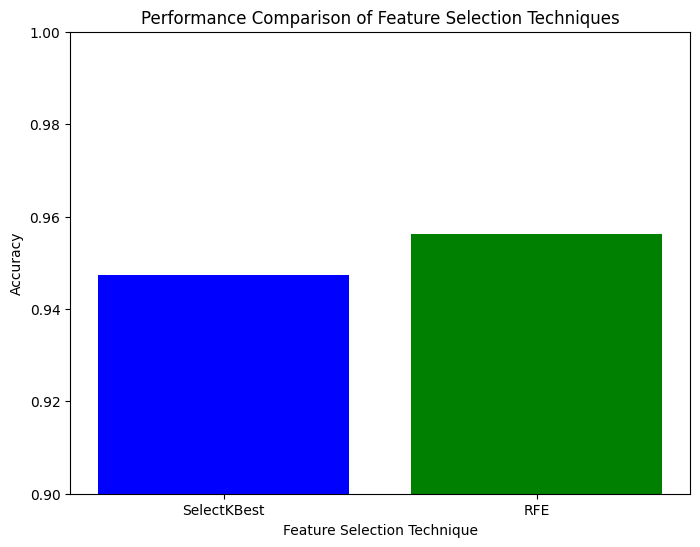

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for each technique
accuracy_scores = [accuracy_kbest, accuracy_rfe]

# Techniques used
techniques = ['SelectKBest', 'RFE']

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(techniques, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Feature Selection Technique')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Feature Selection Techniques')
plt.ylim(0.9, 1)  # Set y-axis limit for better visualization
plt.show()


**Machine Learning Lab 3**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, StratifiedKFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

In [ ]:
# Step 1: Load the Breast Cancer dataset
#cancer = load_breast_cancer()
#X = cancer.data
#y = cancer.target

In [ ]:
# Step 1: Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
# Step 2: Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:

# Initialize lists to store accuracy scores
accuracy_leave_out = []
accuracy_leave_one_out = []
accuracy_k_fold = []
accuracy_stratified = []

In [ ]:
# Step 3: Train the classifier using various cross-validation methods
# Leave-One-Out method
leave_out = LeaveOneOut()
for train_index, test_index in leave_out.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acuracy= accuracy_score(y_test, y_pred)
    print("acuracy", acuracy)
    accuracy_leave_out.append(accuracy_score(y_test, y_pred))


In [ ]:
# Leave-One-Out Cross-Validation
leave_one_out = LeaveOneOut()
accuracy_leave_one_out = cross_val_score(knn, X, y, cv=leave_one_out)
print(accuracy_leave_one_out)
mean_accuracy_leave_one_out = np.mean(accuracy_leave_one_out)

In [ ]:
# K-Fold Cross-Validation (with k=5)
k_fold = KFold(n_splits=5)
accuracy_k_fold = cross_val_score(knn, X, y, cv=k_fold)
print(accuracy_k_fold)
mean_accuracy_k_fold = np.mean(accuracy_k_fold)

print("Mean Accuracy:", mean_accuracy_k_fold)

[0.85087719 0.9122807  0.96491228 0.94736842 0.92920354]
Mean Accuracy: 0.9209284272628473


In [ ]:
# Stratified K-Fold Cross-Validation (with k=5)
stratified_k_fold = StratifiedKFold(n_splits=5)
accuracy_stratified = cross_val_score(knn, X, y, cv=stratified_k_fold)
print(accuracy_stratified)
mean_accuracy_stratified = np.mean(accuracy_stratified)

print("Mean Accuracy:", mean_accuracy_stratified)

[0.87719298 0.92105263 0.94736842 0.93859649 0.91150442]
Mean Accuracy: 0.9191429902189101


In [ ]:
# Step 4: Plot the bar plot
labels = ['Leave-One-Out', 'K-Fold', 'Stratified K-Fold']
mean_accuracies = [mean_accuracy_leave_one_out, mean_accuracy_k_fold, mean_accuracy_stratified]

plt.bar(labels, mean_accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Cross-Validation Method')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy Comparison Across Cross-Validation Methods')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 (accuracy ranges from 0 to 1)
plt.show()

# **Lab 5 Challenge 4**

In [9]:
# Parametrs

dataset_name="Iris" # dataset name
test_size=0.2
train_size=1-test_size
norm= "min-max"
#model="svm"
kernel_type="linear"
gamma=3
c=1.0 # requalrization parameter
degree="scale"
model_name="svm"

print("PARAMETERS:")
print("Dataset Name: {}".format(dataset_name))
print("Test Size: {} %".format(test_size*100))
print("Train Size: {} %".format(train_size*100))
print("Normalization: {}".format(norm))
print("Model: {}".format(model_name))
print("Kernel type: {}".format(kernel_type))


PARAMETERS:
Dataset Name: Iris
Test Size: 20.0 %
Train Size: 80.0 %
Normalization: min-max
Model: svm
Kernel type: linear


In [10]:
# Load or import the dtaset
import sys

from sklearn.datasets import load_iris, load_breast_cancer, load_digits, load_wine

# load Iris dataset
if dataset_name == 'Iris':
  dataset = load_iris()

# load BreastCancer dataset
elif dataset_name == 'Breast':
  dataset = load_breast_cancer()

# load Digits dataset
elif dataset_name == 'Digits':
  dataset = load_digits()

# load Wine dataset
elif dataset_name == 'Wine':
  dataset = load_wine()

else:
  sys.exit("ERROR: wrong dataset name [Breast, Iris, Digits, Wine]")

# read data and target
data, target = dataset.data, dataset.target

# to check dataset
print("DATASET:")
print("Dataset: {}".format(dataset_name))
print("Data: {}".format(len(data)))
print("Target: {}".format(len(target)))


DATASET:
Dataset: Iris
Data: 150
Target: 150


# Dataset Analysis

In [11]:
# Data Anlysis Using Pandas
import pandas as pd

# convert the dataset to a pandas DataFrame for analysis
dataset_df = pd.DataFrame(data=data, columns=dataset.feature_names)
dataset_df['target'] = target

print("DATASET ANALYSIS:")
print(dataset_df.describe())

print("DATASET INFORMATION:")
print(dataset_df.info())




DATASET ANALYSIS:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
DATASET INFORMATION:
<class 'pandas.core.frame.DataFra

| ----------------------- |
| FEATURE REPRESENTATION: |
| ----------------------- |

Feature 1: sepal length (cm)
Feature 2: sepal width (cm)



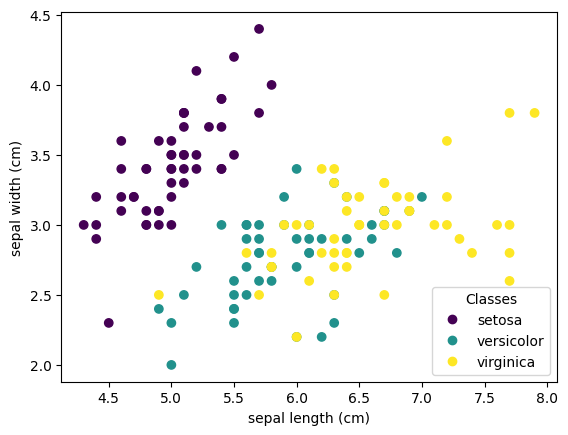

In [12]:
#b feature representation\
import matplotlib.pyplot as plt

print("| ----------------------- |\n"
      "| FEATURE REPRESENTATION: |\n"
      "| ----------------------- |\n")

# idx feature
idx_feature_1 = 0
idx_feature_2 = 1

# create a new figure
_, ax = plt.subplots()

# creating a scatter plot
scatter = ax.scatter(data[:, idx_feature_1], data[:, idx_feature_2], c=target)
ax.set(xlabel=dataset.feature_names[idx_feature_1], ylabel=dataset.feature_names[idx_feature_2])
print("Feature 1: {}\n"
      "Feature 2: {}\n".format(dataset.feature_names[idx_feature_1],
                               dataset.feature_names[idx_feature_2]))

# adding legend
_ = ax.legend(
    scatter.legend_elements()[0], dataset.target_names, loc="lower right", title="Classes"
)

In [13]:
# 3 Data Preparation
from sklearn.model_selection import train_test_split

print("DATA PREPARATION")

# split the data into training and test set
data_train, data_test, target_train, target_test = train_test_split(data,
                                                                    target,
                                                                    test_size=test_size,
                                                                    random_state=42)

# display training set information
print("\nTRAINING SET:")
print("Size: {} % \n"
      "Data: {} \n"
      "Target: {}".format(train_size*100,
                          len(data_train),
                          len(target_train)))

# display test set information
print("\nTEST SET:")
print("Size: {} % \n"
      "Data: {} \n"
      "Target: {}".format(test_size*100,
                          len(data_test),
                          len(target_test)))

DATA PREPARATION

TRAINING SET:
Size: 80.0 % 
Data: 120 
Target: 120

TEST SET:
Size: 20.0 % 
Data: 30 
Target: 30


# Dataset Normalization

In [14]:
# Dataset Normalization
print("Dataset Normalization")
import sys

from sklearn.preprocessing import MinMaxScaler, StandardScaler

print("DATASET NORMALIZATION")
print("Normalization: {}".format(norm))

# min-max normalization
if norm == 'min-max':
  # define scaler
  scaler = MinMaxScaler()

# std normalization
elif norm == 'std':
  # define scaler
  scaler = StandardScaler()

elif norm == 'none':
  data_train_scaled = data_train
  data_test_scaled = data_test

else:
  sys.exit("ERROR: wrong normalization [min-max, std]")

# apply normalization
if norm == 'min-max' or norm =='std':
  data_train_scaled = scaler.fit_transform(data_train)
  data_test_scaled = scaler.transform(data_test)







Dataset Normalization
DATASET NORMALIZATION
Normalization: min-max


In [15]:
# 4. Model Defineation or creation
print("model creation")
from sklearn.svm import SVC

 # define svm model
if kernel_type=="linear":
  model =  SVC(kernel=kernel_type, random_state=42)
elif kernel_type=="poly":
  modle=SVC(kernel=kernel_type,C=c, degree= degree, gamma=gamma, random_state=42)
elif kernel_type=='rbf':
  model=SVC(kernel=kernel)







model creation


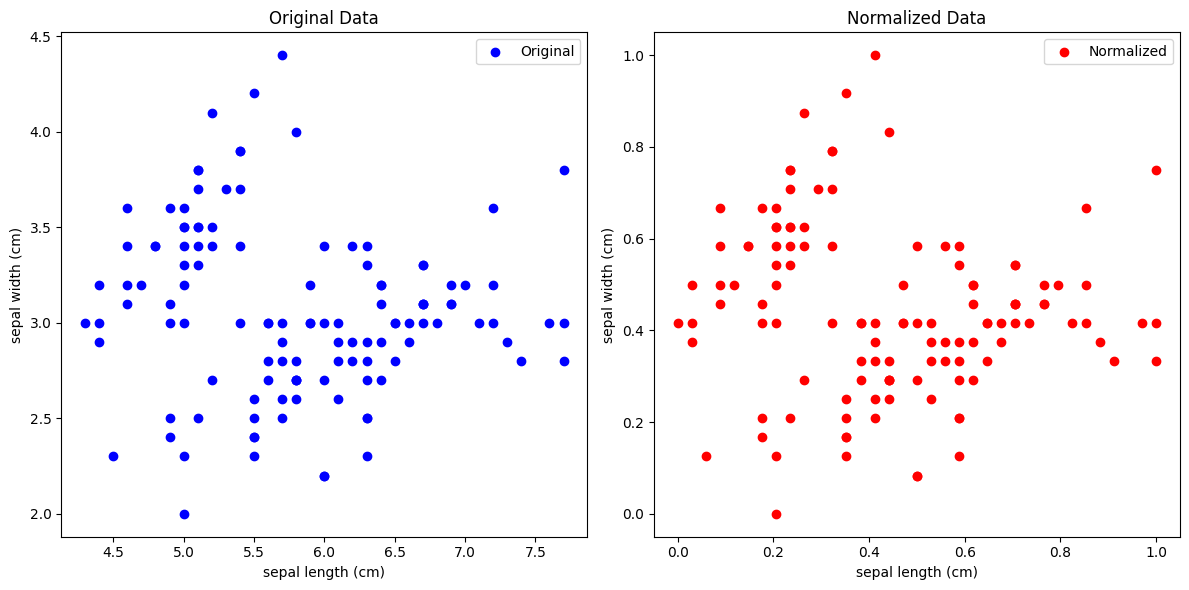

In [16]:
import matplotlib.pyplot as plt

# idx feature
feature_idx_1 = 0  #
feature_idx_2 = 1  #

# define figure
plt.figure(figsize=(12, 6))

# original data plot
plt.subplot(1, 2, 1)
plt.scatter(data_train[:, feature_idx_1], data_train[:, feature_idx_2], color='blue', label='Original')
plt.title('Original Data')
plt.xlabel(f'{dataset.feature_names[idx_feature_1]}')
plt.ylabel(f'{dataset.feature_names[idx_feature_2]}')
plt.legend()

# normalized data
plt.subplot(1, 2, 2)
plt.scatter(data_train_scaled[:, feature_idx_1], data_train_scaled[:, feature_idx_2], color='red', label='Normalized')
plt.title('Normalized Data')
plt.xlabel(f'{dataset.feature_names[idx_feature_1]}')
plt.ylabel(f'{dataset.feature_names[idx_feature_2]}')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
#5 Model Creation

from sklearn.svm import SVC

print("MODEL CREATION:")

# define SVM model with linear kernel
if kernel_type == 'linear':
  model= SVC(kernel='linear',
             random_state=42)

# define SVM model with poly kernel
elif kernel_type == 'poly':
  model= SVC(kernel='poly',
             degree=degree,
             gamma=gamma,
             random_state=42)

# define SVM model with rbf kernel
elif kernel_type == 'rbf':
  model = SVC(kernel_type='rbf',
              C=C,
              gamma=gamma,
              random_state=42)

# define SVM model with sigmoid kernel
elif kernel_type == 'sigmoid':
  model = SVC(kernel_type='sigmoid',
              gamma=gamma,
              random_state=42)

else:
  sys.exit("ERROR: wrong kernel type [linear, poly, rbf, sigmoid]")

print("Model {} with {} kernel".format(model_name,
                                       kernel_type))

MODEL CREATION:
Model svm with linear kernel


In [27]:
#Other Models being Created

from sklearn import tree
from sklearn.neighbors import NearestNeighbors

model1=tree.DecisionTreeClassifier()
model2=NearestNeighbors(n_neighbors=2, algorithm='ball_tree')




In [19]:
#4a Parameter optimization
# define the paramaeterss to be search
from sklearn.model_selection import GridSearchCV
param_grid={
    'C':[0.1,1,10, 100],
    'gamma':[0.001,0.01,0.1,1],
    'kernel':['linear','poly','rbf', 'sigmoid']
}
# initializs model
svm=SVC(random_state=42)
#grid search
grid_search=GridSearchCV(estimator=svm,param_grid=param_grid,
                cv=5,scoring="accuracy", n_jobs=1
                         )


In [20]:
#Model Training
print("MODEL TRAINING:")



# train model
model.fit(data_train_scaled, target_train)

MODEL TRAINING:


SVC(kernel='linear', random_state=42)

In [21]:
# model training with optimization
print("Model Training Optimization")
grid_search.fit(data_train_scaled, target_train)

# Display the best performance
print("best accuracy :{}", format(grid_search.best_params_))
print("Best accuracy  : {}", format(grid_search.best_score_))


Model Training Optimization
best accuracy :{} {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best accuracy  : {} 0.9666666666666668


In [22]:
# 6 Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

print("MODEL EVALUATION:")

# performs predictions on test set
predictions_test = model.predict(data_test_scaled)

# computes accuracy of predictions
accuracy = accuracy_score(y_true=target_test,
                          y_pred=predictions_test)

# display accuracy
print("Accuracy: {:.2f} %".format(accuracy*100))

# compute classification report
target_names = dataset.target_names.astype(str).tolist()  # get target names
cls_report = classification_report(y_true=target_test,
                                   y_pred=predictions_test)

print("\nClassification Report:")
print(cls_report)


MODEL EVALUATION:
Accuracy: 100.00 %

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [23]:
#Model Evaluation With Parameter Optimization
prediction=grid_search.predict(data_test_scaled)
accuracy = accuracy_score(y_true=target_test,
                          y_pred=prediction)

# display accuracy
print("Accuracy: {:.2f} %".format(accuracy*100))

# compute classification report
target_names = dataset.target_names.astype(str).tolist()  # get target names
cls_report = classification_report(y_true=target_test,
                                   y_pred=prediction)

print("\nClassification Report:")
print(cls_report)


Accuracy: 96.67 %

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [24]:
# cross validation






In [28]:
#k-fold validation
fold=5
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model1,
                       data,
                       target,
                       cv=fold)

for i in range(fold):
    print("fold: {} {:,}".format(i+1, scores[i]))

ave_performance = scores.mean()
print("average performance: {}".format(ave_performance))


fold: 1 0.9666666666666667
fold: 2 0.9666666666666667
fold: 3 0.9
fold: 4 1.0
fold: 5 1.0
average performance: 0.9666666666666668


In [ ]:
#Stratified Validation
from sklearn.model_selection import StratifiedKFold

print("| ---------------------------- |\n"
      "| STRATIFIED CROSS VALIDATION: |\n"
      "| ---------------------------- |\n")

# show number of splits
num_splits=5
print("Number of Splits: {}".format(num_splits))

# init Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

# init hist
accuracies = []

# start loop
print("\nSTRATIFIED FOLD CROSS VALIDATION:")
for fold_idx, (train_index, test_index) in enumerate(skf.split(data, target), 1):
    data_train, data_test = data[train_index], data[test_index]
    target_train, target_test = target[train_index], target[test_index]

    # train model
    model.fit(data_train, target_train)

    #evaluate prediction
    accuracy = model.score(data_test, target_test)

    # show performance per fold
    print("Fold-{} "
          "Training set: {} "
          "Test set: {} "
          "Accuracy: {:.3f} ".format(fold_idx,
                                     len(data_train),
                                     len(data_test),
                                     accuracy))

    # append accuracy
    accuracies.append(accuracy)

# compute average accuracy
mean_accuracy = sum(accuracies) / len(accuracies)

print("\nAccuracy: {:.3f}".format(mean_accuracy))


# Callenge 5


In [32]:
# pipeline challenges

from sklearn.pipeline import Pipeline
#define pipeline
pipeline=Pipeline([
     ('scalar',scaler),
     ('classifier', model1)

]

)
#fit the pipeline
pipeline.fit(data_train, target_train)

#make prediction
pred=pipeline.predict(data_test)

#check accuracy
accuracy= accuracy_score(y_true=target_test,
                         y_pred=pred)
print("accuracy :{}", format(accuracy))

accuracy :{} 1.0


# Challenge 6

# Unsupervised Learning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


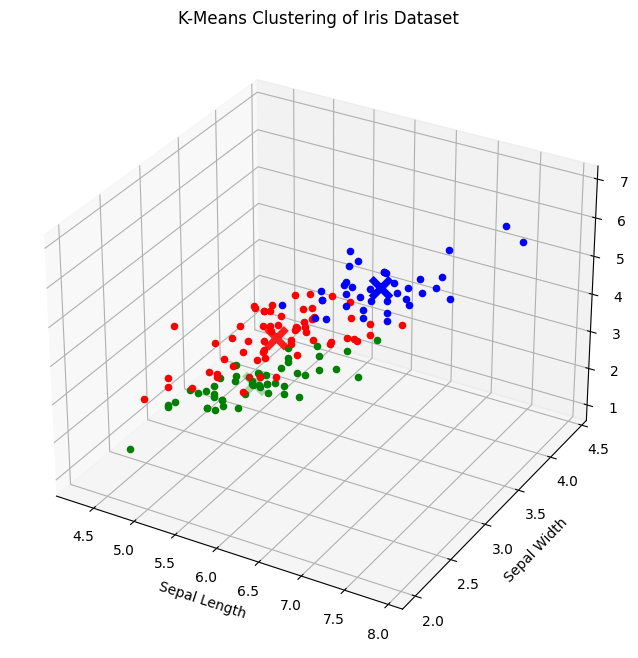

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Ground truth labels

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Visualize the clusters in a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to different clusters
colors = ['r', 'g', 'b']
for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

# Plot centroids
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
            marker='x', s=200, linewidths=5, zorder=10, c=colors)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

plt.title('K-Means Clustering of Iris Dataset')
plt.show()


In [33]:
# Unsupervised Learning from the lecture
# PARAMETERS
dataset_name = 'Iris'                           # dataset name [Iris]
norm = 'min-max'                                # normalization [none, min-max, std]

print("| ----------- |\n"
      "| PARAMETERS: |\n"
      "| ----------- |\n")

print("Dataset: {}".format(dataset_name))
print("Norm: {}".format(norm))

| ----------- |
| PARAMETERS: |
| ----------- |

Dataset: Iris
Norm: min-max


In [34]:
import sys
from sklearn.datasets import load_iris, load_breast_cancer, load_digits

# load Iris dataset
if dataset_name == 'Iris':
      dataset = load_iris()
# load Breast Cancer Wisconsin dataset
elif dataset_name == 'Breast':
      dataset = load_breast_cancer()
# load Digits dataset
elif dataset_name == 'Digits':
      dataset = load_digits()
else:
      sys.exit("ERROR: Dataset Loading [Iris, Breast, Digits]")

# read data (features) and target (label)
data, target = dataset.data, dataset.target

print("| -------- |\n"
      "| DATASET: |\n"
      "| -------- |\n")

# display information
print("Dataset: {}\n"
      "Data: {}\n"
      "Target: {}\n".format(dataset_name,
                            len(data),
                            len(target)))

| -------- |
| DATASET: |
| -------- |

Dataset: Iris
Data: 150
Target: 150



| ---------------------- |
| DATASET NORMALIZATION: |
| ---------------------- |



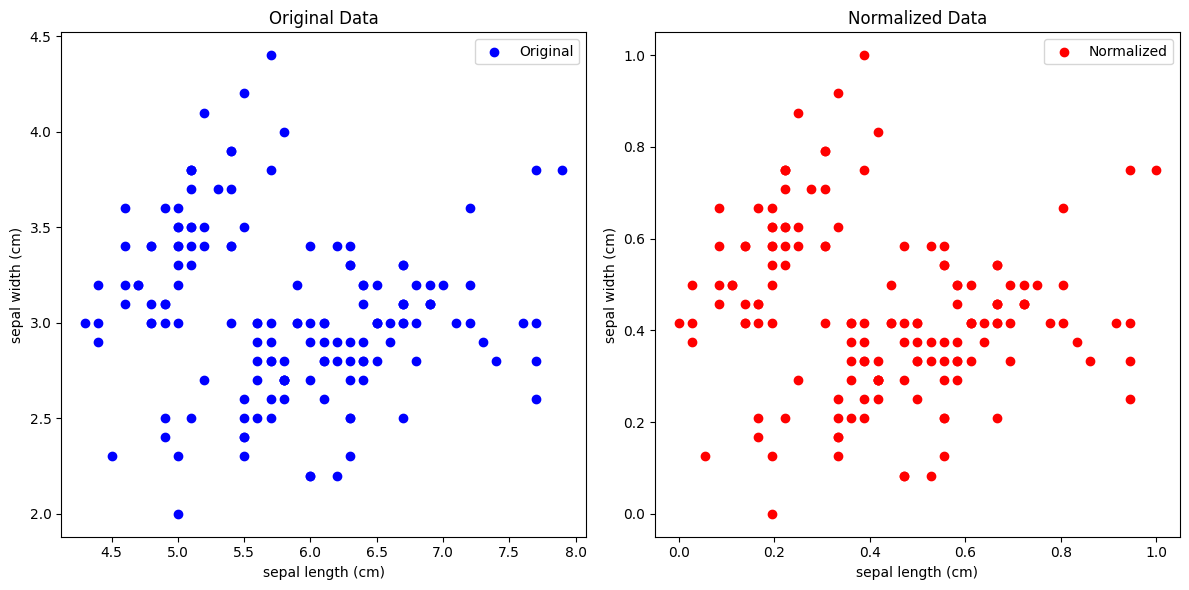

In [35]:
import sys
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

print("| ---------------------- |\n"
      "| DATASET NORMALIZATION: |\n"
      "| ---------------------- |\n")

# min-max normalization
if norm == 'min-max':
      # define scaler
      scaler = MinMaxScaler()

# std normalization
elif norm == 'std':
      # define scaler
      scaler = StandardScaler()

else:
      sys.exit("ERROR: Dataset Normalization [min-max, std]")

# no normalization
if norm == 'none':
      data_scaled = data

# apply normalization
else:
      # apply the normalization
      data_scaled = scaler.fit_transform(data)

# idx feature
feature_idx_1 = 0  # Indice della prima feature
feature_idx_2 = 1  # Indice della seconda feature

# define figure
plt.figure(figsize=(12, 6))

# original data plot
plt.subplot(1, 2, 1)
plt.scatter(data[:, feature_idx_1], data[:, feature_idx_2], color='blue', label='Original')
plt.title('Original Data')
plt.xlabel(f'{dataset.feature_names[feature_idx_1]}')
plt.ylabel(f'{dataset.feature_names[feature_idx_2]}')
plt.legend()

# normalized data
plt.subplot(1, 2, 2)
plt.scatter(data_scaled[:, feature_idx_1], data_scaled[:, feature_idx_2], color='red', label='Normalized')
plt.title('Normalized Data')
plt.xlabel(f'{dataset.feature_names[feature_idx_1]}')
plt.ylabel(f'{dataset.feature_names[feature_idx_2]}')
plt.legend()

plt.tight_layout()
plt.show()

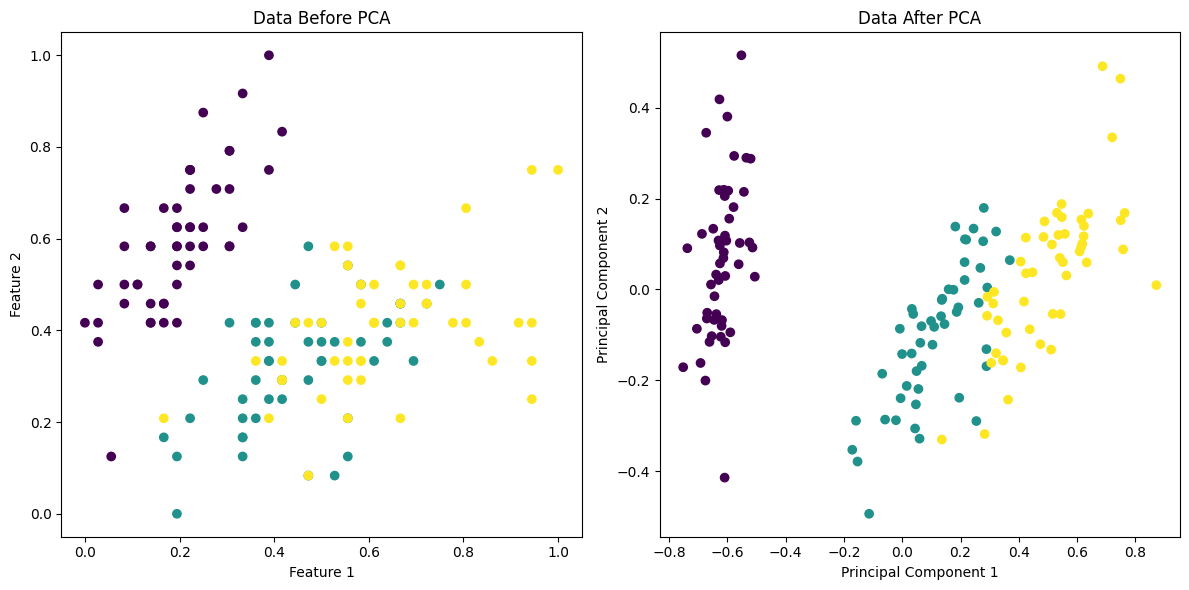

In [36]:
from sklearn.decomposition import PCA

# dimensionality reduction with PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# show data before PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=target)
plt.title('Data Before PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# show data after PCA
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=target)
plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("| ---------------------- |\n"
      "| UNSUPERVISED LEARNING: |\n"
      "| ---------------------- |\n")

model = KMeans(n_clusters=3, random_state=42)
print("Model: KMeans")

# performs predictions on data
labels_predicted = model.fit_predict(data_scaled)

# evaluate predictions
silhouette_score_value = silhouette_score(data_scaled, labels_predicted)
print("Silhouette Score: {:.3f}".format(silhouette_score_value))

| ---------------------- |
| UNSUPERVISED LEARNING: |
| ---------------------- |

Model: KMeans
Silhouette Score: 0.505


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


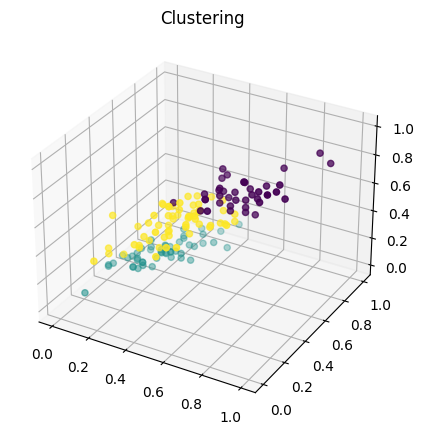

In [38]:
import matplotlib.pyplot as plt

# dimensionality reduction to 3 to visualise clusters in 3D
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=labels_predicted, cmap='viridis')
ax1.set_title('Clustering')
plt.show()